# GRIP : TFS Training

## Task 2

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns


# Reading and Exploring data

In [87]:
df = pd.read_csv('Iris.csv')

In [88]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


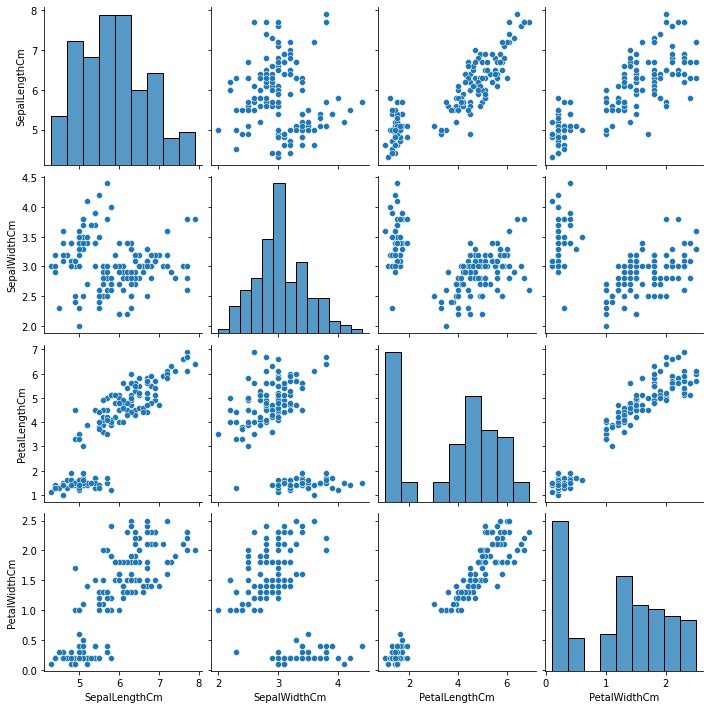

In [91]:
sns.pairplot(df)

# Preprossising the data

In [90]:
#drop id column 
df.drop(['Id'], axis=1, inplace=True)

In [85]:
X = df
# target variable
y = df['Species']

## encoding the target

In [ ]:
# importing label encoder
from sklearn.preprocessing import LabelEncoder

# converting the non-numeric to numeric values
le = LabelEncoder()
X['Species'] = le.fit_transform(X['Species'])
y = le.transform(y)

In [47]:
print(df.iloc[:, -1].values  )

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Training Kmeans Alogrithm

* ##  with k =1

In [54]:
from sklearn.cluster import KMeans

# k value assigned to 2
kmeans = KMeans(n_clusters=2, random_state=0) 

# fitting the values
kmeans.fit(X)

# Cluster centers
kmeans.cluster_centers_

array([[5.00784314, 3.4       , 1.49411765, 0.26078431, 0.01960784],
       [6.27373737, 2.87575758, 4.92525253, 1.68181818, 1.50505051]])

In [55]:
print (kmeans.inertia_)

179.1222103386809


In [51]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 99 out of 150 samples were correctly labeled.


* ##  with k =3

In [60]:
kmeans = KMeans(n_clusters=3, random_state=0) 

# fitting the values
kmeans.fit(X)

print (kmeans.inertia_)

87.31002785114046


In [61]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 149 out of 150 samples were correctly labeled.


# Visualizing dataset clusters


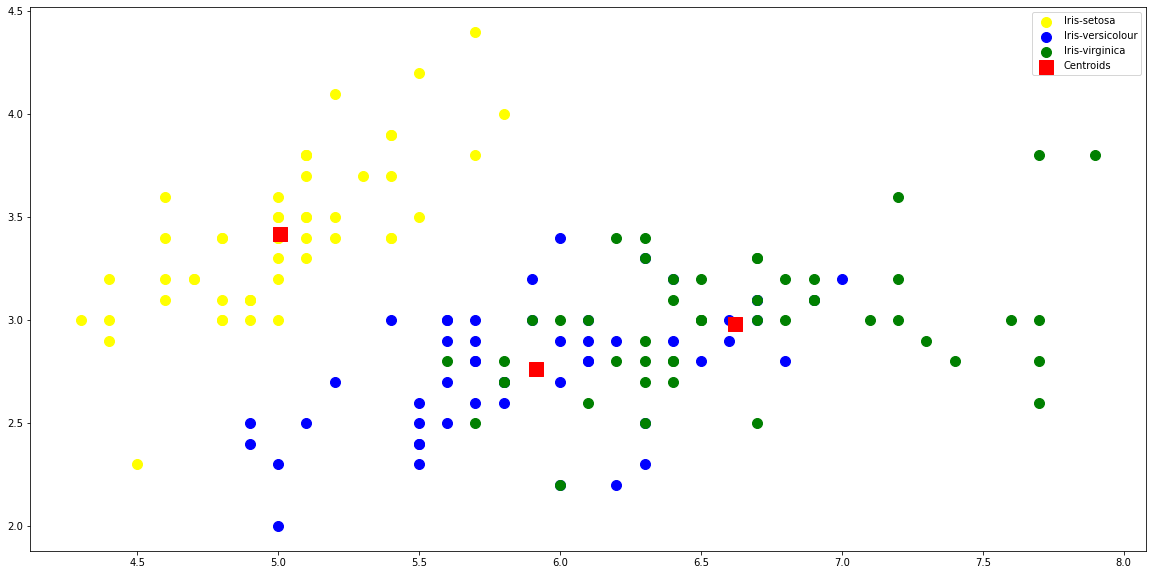

In [77]:
import matplotlib.pyplot as plt  
%matplotlib inline

kmeans = KMeans(n_clusters = 3, random_state = 42)
y_kmeans = kmeans.fit_predict(X)
X = np.array(X)


plt.figure(figsize=(20,10))

# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 200, c = 'red',marker=',' , label = 'Centroids')

plt.legend()